<a href="https://colab.research.google.com/github/DLesmes/Dlesmes.github.io/blob/master/PruebaTecnicaAntivirus_Rta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prueba técnica: Análisis de mercado mobiliario


**Desarrollado por Diego Lesmes**

# 1. Prensado como un Data Science

¿Qué datos crees que te ayudarían a trabajar en el problema? ¿Por qué?

#Respuesta

Dentro de los diferentes atributos o características que podrían ser útiles para determinar el valor de una propiedad, se pueden tener en cuenta características como:

*   Tipo de propiedad: Residencial, comercial, apartamento entre otros
*   Área: Tamaño del predio que ocupa la propiedad
*   Área cubierta: Área Total sin tener en cuenta área al expuesta al aire libre
*   Ubicación: datos de latitud y longitud, para deerminar la ubicación del predio, de aca podemos obtener otros datos como:
  *   Departamento
  *   Ciudad
  *   Barrio
*   Diseño arquitectónico: tipo Arquitectonico de la propiedad
*   Año de construcción: Esta fecha nos podra indicar la antiguedad de la propiedad
*   '# de balcones: La cantidad de balcones con los que cuenta la propiedad
*   '# de habitaciones: La cantidad de cuartos con la que cuenta la propiedad
*   '# de baños: La cantidad de baños con la que cuenta la propiedad
*   Precio Comercial: El precio al cual esta valuada la propiedad
*   Precio catastral: El precio usado para causar impuestos
*   Precio de venta: El precio de venta de la propiedad
*   Fecha de la venta: Si la propiedad fue vendida anteriormente de esta manera se podría aplicarle el efecto de la infliación a los precios para hacerlos comparables
*   Paqueadero: Si la propiedad cuenta con parqueadero
*   Garaje: Si cuenta con un salón de garaje   
*   Unidades residenciales: Si la propiedad cuenta con varios apartamentos
*   Piso: si se trata de una unidad residencial en que piso se encuentra

En general esta información podría ser muy util para poder realizar un modelo predictivo que determine el valor de la propiedad, debido a que estas características inciden principalmente a la hora de realizar la venta de las propiedades, sin embargo el modelo esta en función del procedimiento que se realice en la información disponible y el análisis estadístico pertinente.


# 2. Análisis Exploratorio de Datos

In [5]:
from google.colab import files
data_to_load = files.upload()

Saving DS_Proyecto_01_Datos_Properati.csv to DS_Proyecto_01_Datos_Properati (1).csv


In [7]:
import io
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
def RMSE(prediction,true_values):  # Root Mean Squared Error
    return np.sqrt(np.mean(np.square(prediction-true_values)))
def MAE(prediction,true_values): #Mean Absolute Error
    return np.mean(np.abs(prediction-true_values))
def MAPE(prediction,true_value): #Mean Absolute Error Percenage
    return np.mean(np.abs((prediction-true_value)/true_value)*100)

In [6]:
df = pd.read_csv(io.BytesIO(data_to_load['DS_Proyecto_01_Datos_Properati.csv']))
df.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [380]:
len(list(df.columns))

19

In [381]:
df.shape

(146660, 19)

In [7]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [264]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features.sort_values('type')

,type
bedrooms,float64
lat,float64
lon,float64
price,float64
surface_covered,float64
rooms,float64
surface_total,float64
bathrooms,float64
description,object
title,object


In [9]:
df.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [10]:
df.describe(include='object')

,start_date,end_date,created_on,l1,l2,l3,currency,title,description,property_type,operation_type
count,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660,146660
unique,366,412,366,1,4,89,1,77733,106668,10,1
top,2019-07-31,9999-12-31,2019-07-31,Argentina,Capital Federal,Palermo,USD,DEPARTAMENTO EN VENTA,EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...,Departamento,Venta
freq,11022,25101,11022,146660,92539,13073,146660,5064,235,107326,146660


In [ ]:
df_cleaned['property_type'].value_counts()

Departamento     1520
Casa              625
PH                355
Lote                3
Casa de campo       2
Otro                2
Oficina             2
Cochera             1
Name: property_type, dtype: int64

In [354]:
round(df.describe(include='float64'),2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


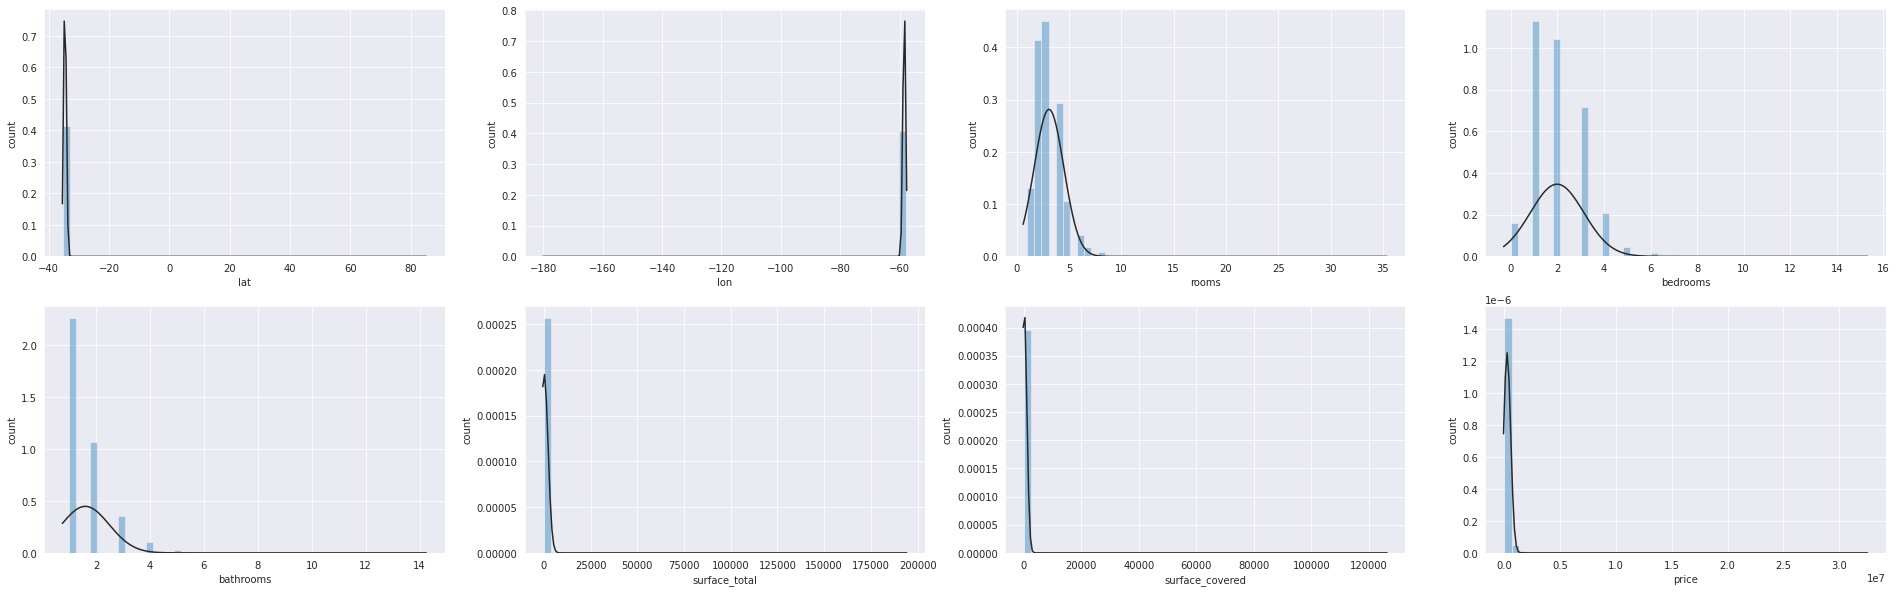

In [145]:
var_hist = features_f
plt.figure(figsize=(33,10))
for i,var in enumerate(var_hist):
    plt.subplot(2,len(features_f)/2,i+1)
    sns.distplot(df[var],fit=stats.norm, kde=False)
    plt.xlabel(var)
    plt.ylabel("count")

In [8]:
clean = np.where(
    (df["lat"] < -21) & # norte
    (df["lat"] > -56) & # sur
    (df["lon"] > -58) & # este
    (df["lon"] < -26)  & # oeste
    (df["price"] > 1)  &
    (df["surface_total"] > 0)  &
    (df["surface_covered"] > 0) &
    #(pd.to_numeric(df["end_date"]) < pd.to_numeric(pd.Timestamp.now())) &
    (df["bathrooms"] > 0) #&
    )
df_cleaned = df.iloc[clean].copy()
df_cleaned['log_Price'] = np.log(df_cleaned['price'])
df_cleaned['log_Price_per_S_total'] = np.log(df_cleaned['price']/df_cleaned["surface_total"])
df_cleaned['log_Price_per_S_covered'] = np.log(df_cleaned['price']/df_cleaned["surface_covered"])
df_cleaned['log_S_total'] = np.log(df_cleaned["surface_total"])
df_cleaned['log_S_covered'] = np.log(df_cleaned["surface_covered"])
df_cleaned['start_date_P'] = pd.DatetimeIndex(df_cleaned["start_date"]).month #pd.to_datetime(df_cleaned["start_date"]).dt.to_period("M")
#df_cleaned['end_date_P'] = pd.to_datetime(pd.Timestamp.date(pd.to_datetime(df_cleaned["end_date"]))).dt.to_period("M")
df_cleaned['created_on_P'] = pd.DatetimeIndex(df_cleaned["start_date"]).month #pd.to_datetime(df_cleaned["created_on"]).dt.to_period("M")
df_cleaned = df_cleaned[df_cleaned.property_type.isin(["Departamento", "Casa", "PH"])]

In [9]:
df_cleaned.shape

(2500, 26)

In [11]:
features = pd.DataFrame(df_cleaned.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features.shape
#features

(26, 1)

In [272]:
features_numeric = ['rooms',	'bathrooms',	'surface_total',	'surface_covered',	'price']
BC_matrix = []
for var in features_numeric:
  BC_matrix.append(stats.boxcox(abs(df_cleaned[var])))
BC_matrix = pd.DataFrame(BC_matrix)
BC_matrix.index = features_numeric
BC_matrix.head(5)

,0,1
rooms,"[0.6835402113425889, 1.5582731494849469, 1.728...",-0.040365
bathrooms,"[0.0, 0.21254385965869124, 0.22080520321171682...",-4.496473
surface_total,"[1.6426903407178417, 1.6943379838212267, 1.772...",-0.533132
surface_covered,"[2.0674530723034104, 2.2838671387780014, 2.447...",-0.338521
price,"[3.671046807096595, 3.740140637332042, 3.75318...",-0.253925


In [360]:
round(df_cleaned.describe(include='float64'),2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,log_Price,log_Price_per_S_total,log_Price_per_S_covered,log_S_total,log_S_covered
count,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00,2500.00
mean,-34.92,-57.96,3.41,1.97,1.32,235.11,130.37,123128.31,11.57,7.01,7.29,4.56,4.28
std,0.02,0.02,1.69,1.04,0.70,1831.43,1279.67,77945.77,0.52,0.72,0.44,0.86,0.62
min,-35.03,-58.00,1.00,0.00,1.00,12.00,2.00,13000.00,9.47,0.66,0.32,2.48,0.69
25%,-34.93,-57.97,2.00,1.00,1.00,51.00,47.00,75000.00,11.23,6.80,7.11,3.93,3.85
50%,-34.92,-57.96,3.00,2.00,1.00,76.00,65.00,98000.00,11.49,7.22,7.36,4.33,4.17
75%,-34.91,-57.95,4.00,2.00,1.00,152.00,100.00,141250.00,11.86,7.47,7.54,5.02,4.61
max,-34.88,-57.81,30.00,13.00,14.00,67000.00,58000.00,620000.00,13.34,9.12,10.34,11.11,10.97


In [12]:
df_cleaned.describe(include='int64')
#df_cleaned.describe(include='object')

,start_date_P,created_on_P
count,2500.000000,2500.000000
mean,5.913600,5.913600
std,3.395106,3.395106
min,1.000000,1.000000
25%,3.000000,3.000000
50%,6.000000,6.000000
75%,9.000000,9.000000
max,12.000000,12.000000


In [13]:
var_hist = ['lat',	'lon',	'rooms',	'bedrooms',	'bathrooms',
            'log_Price',	'log_Price_per_S_total',	'log_Price_per_S_covered',	'log_S_total',	'log_S_covered','start_date_P','created_on_P']
len(var_hist)

12

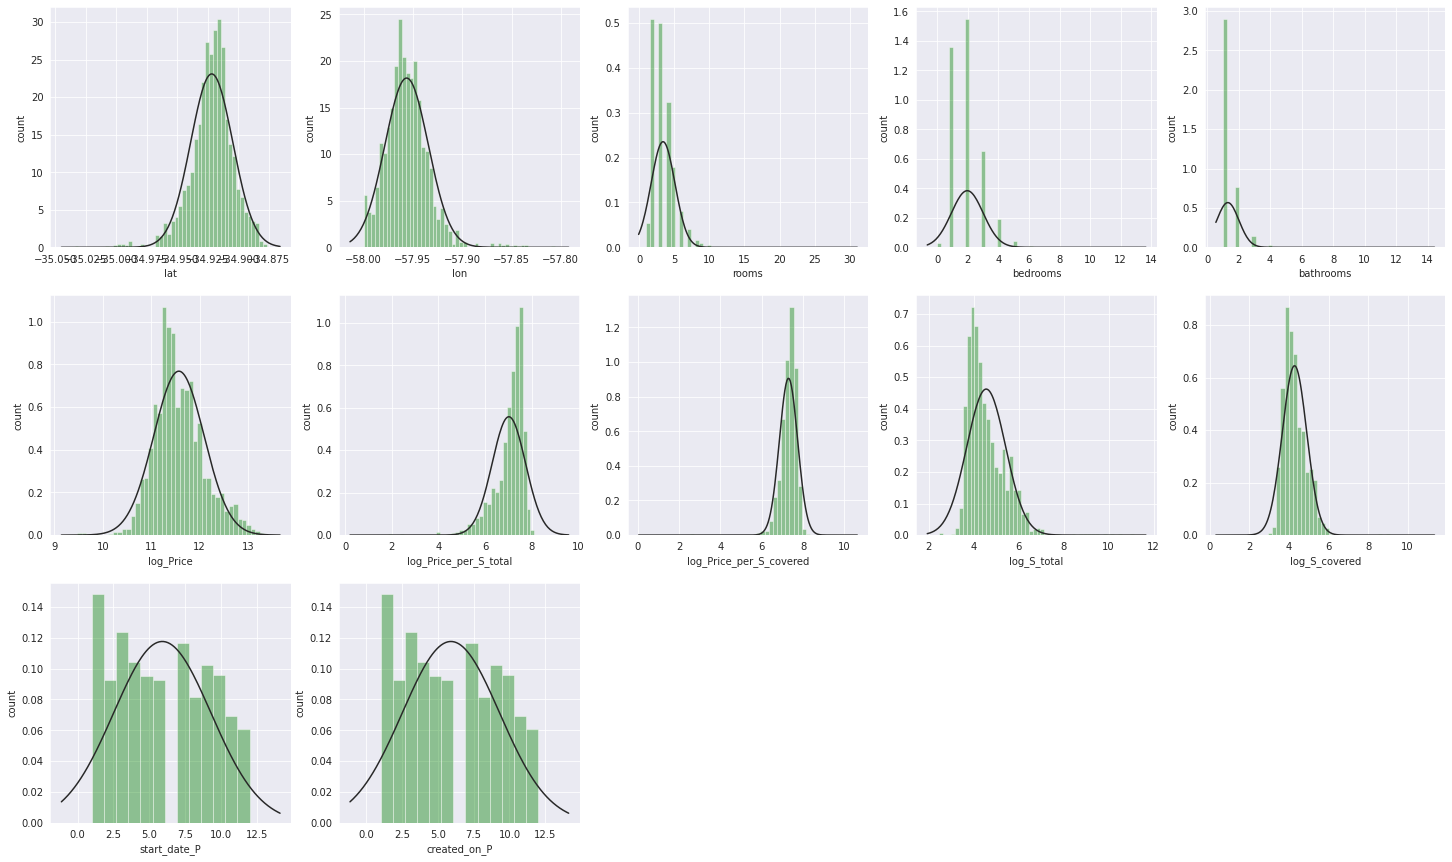

In [15]:
plt.figure(figsize=(25,15))
for i,var in enumerate(var_hist):
    plt.subplot(3,5,i+1)
    sns.distplot(df_cleaned[var],fit=stats.norm, kde=False, color='g')
    plt.xlabel(var)
    plt.ylabel("count")

In [16]:
df_cleaned.isnull().sum()

start_date                 0
end_date                   0
created_on                 0
lat                        0
lon                        0
l1                         0
l2                         0
l3                         0
rooms                      0
bedrooms                   0
bathrooms                  0
surface_total              0
surface_covered            0
price                      0
currency                   0
title                      0
description                0
property_type              0
operation_type             0
log_Price                  0
log_Price_per_S_total      0
log_Price_per_S_covered    0
log_S_total                0
log_S_covered              0
start_date_P               0
created_on_P               0
dtype: int64

In [120]:
df_cleaned['currency'].unique()

array(['USD'], dtype=object)

In [122]:
df_cleaned['operation_type'].unique()

array(['Venta'], dtype=object)

In [123]:
df_cleaned['l1'].unique()

array(['Argentina'], dtype=object)

In [124]:
df_cleaned['l2'].unique()

array(['Bs.As. G.B.A. Zona Sur'], dtype=object)

In [125]:
df_cleaned['l3'].unique()

array(['La Plata', 'Esteban Echeverría'], dtype=object)

In [126]:
len(df_cleaned[df_cleaned['l3']=='Esteban Echeverría'])

1

In [17]:
varstolook = ['start_date_P','created_on_P', 'property_type','rooms', 'bedrooms', 'bathrooms',
              'lat','lon','log_Price_per_S_total','log_Price_per_S_covered','log_S_total','log_S_covered','price','log_Price']
len(varstolook)

14

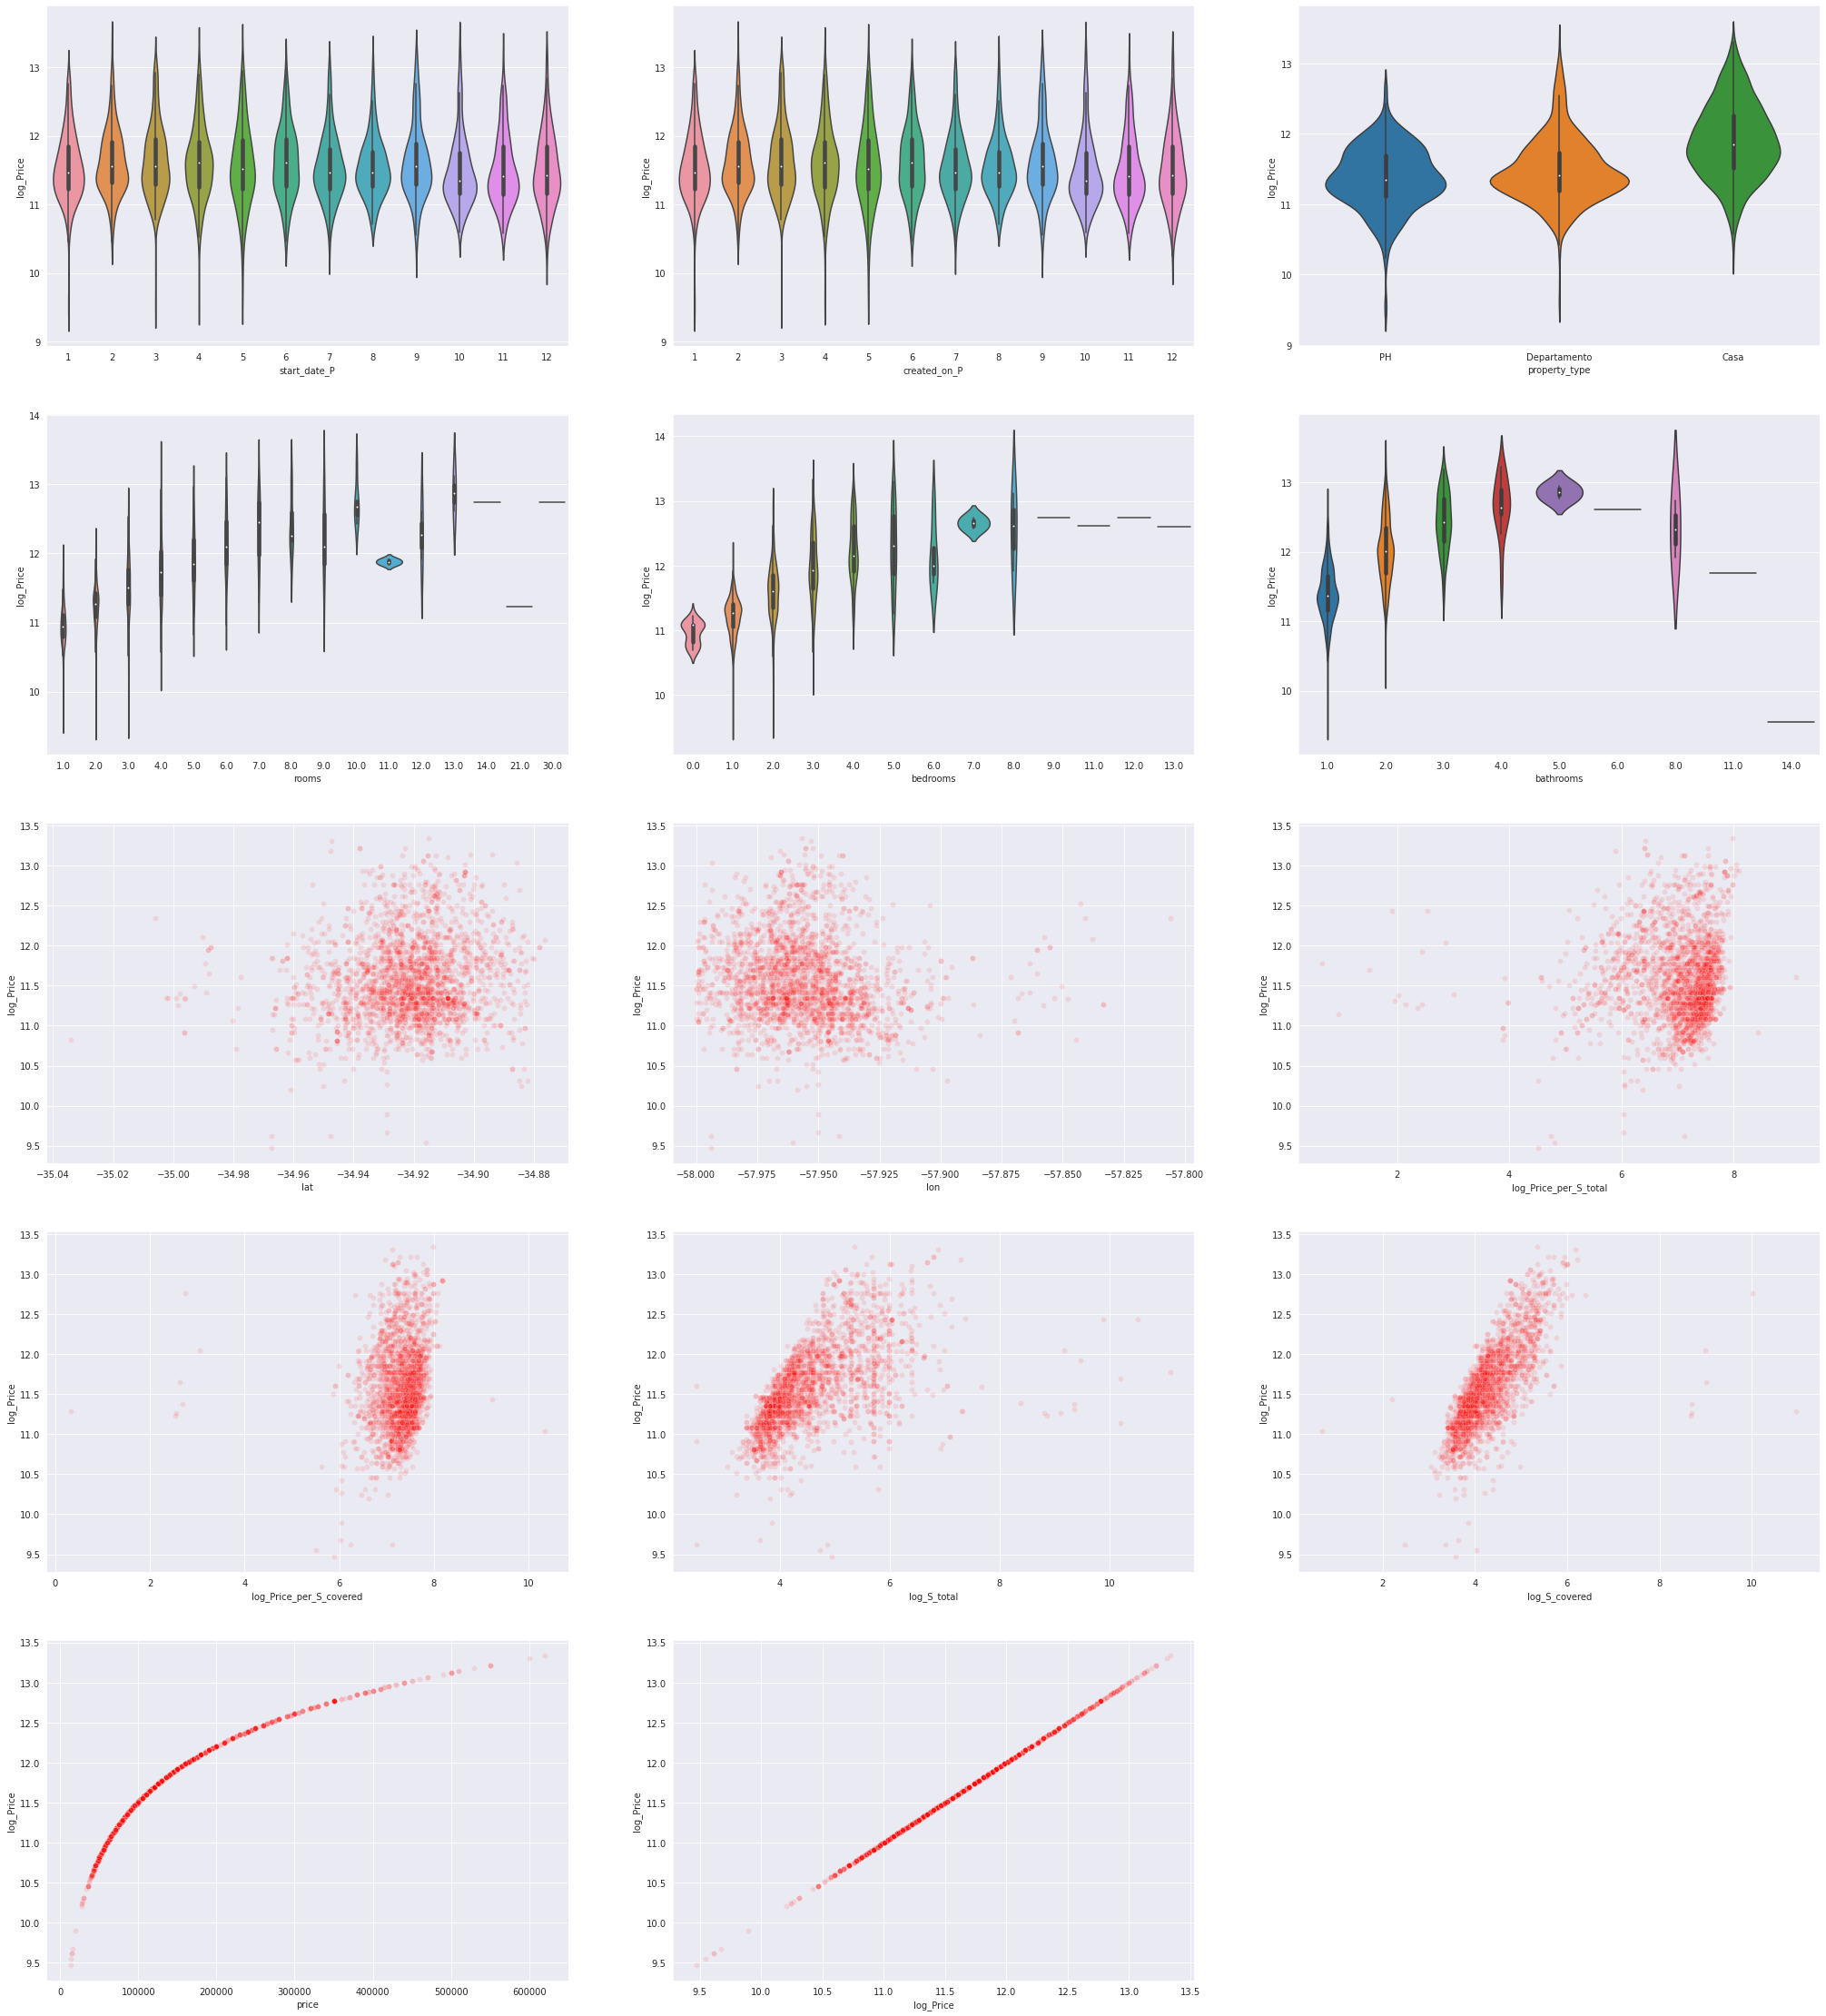

In [18]:
plt.figure(figsize=(35,40))
for i,var in enumerate(varstolook):
    plt.subplot(5,3,i+1)
    if var in ['start_date_P','created_on_P','bathrooms','rooms','bedrooms','property_type']:
        sns.violinplot(x=var, y='log_Price', data=df_cleaned)
    else:
        sns.scatterplot(x=var,y='log_Price',data=df_cleaned, alpha=0.10,color='r')

Text(0.5, 1.0, 'Correlations between predictors')

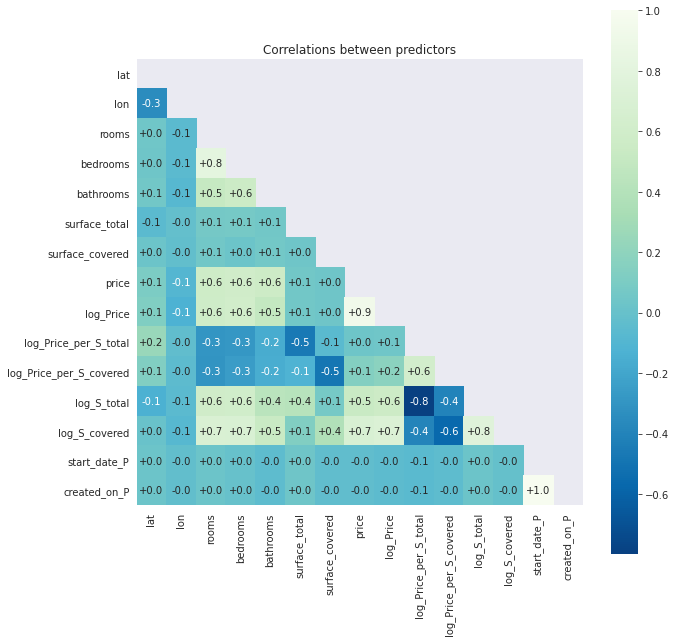

In [19]:
#compute correlation matrix
df_correlations = df_cleaned.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
sns.heatmap(df_correlations, mask=mask, cmap="GnBu_r",#"RdYlBu", 
    annot=True, square=True,
    #vmin=-0.9, vmax=0.9,
    fmt="+.1f")
plt.title("Correlations between predictors")

In [20]:
df_covar = df_cleaned[['start_date_P','property_type','rooms', 'bedrooms', 'bathrooms',
              'lat','lon','log_Price_per_S_total','log_Price_per_S_covered','log_Price','price']]

Text(0.5, 1.0, 'Correlations between predictors')

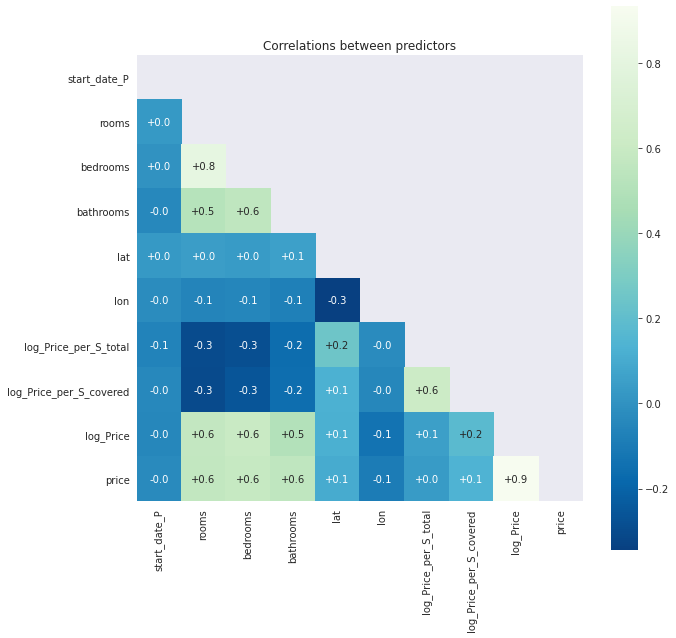

In [21]:
#compute correlation matrix
df_correlations = df_covar.corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize= (10,10))
sns.heatmap(df_correlations, mask=mask, cmap="GnBu_r",#"RdYlBu", 
    annot=True, square=True,
    #vmin=-0.8, vmax=0.8, 
    fmt="+.1f")
plt.title("Correlations between predictors")

In [22]:
df_covar.columns

Index(['start_date_P', 'property_type', 'rooms', 'bedrooms', 'bathrooms',
       'lat', 'lon', 'log_Price_per_S_total', 'log_Price_per_S_covered',
       'log_Price', 'price'],
      dtype='object')

In [327]:
df_covar.shape

(2500, 12)

Text(0.5, 1.0, 'Log-price vs lon')

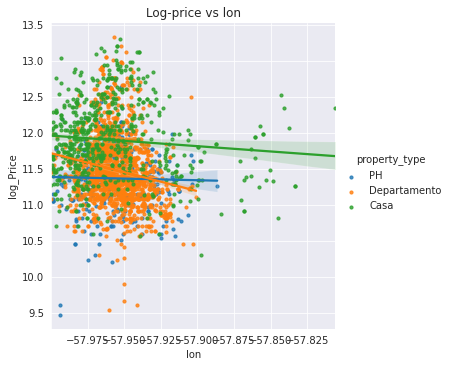

In [23]:
sns.lmplot(x='lon', y='log_Price', data=df_covar,
             hue="property_type", height=5, scatter_kws={"s": 10})
plt.title("Log-price vs lon")

Text(0.5, 1.0, 'Log-price vs lat')

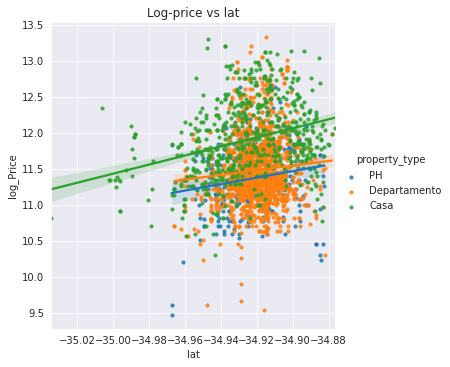

In [225]:
sns.lmplot(x='lat', y='log_Price', data=df_covar,
             hue="property_type", height=5, scatter_kws={"s": 10})
plt.title("Log-price vs lat")

Text(0.5, 1.0, "Log-price vs 'log(Price/S_total)'")

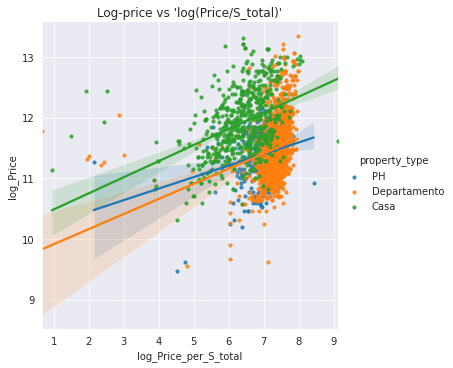

In [226]:
sns.lmplot(x='log_Price_per_S_total', y='log_Price', data=df_covar,
             hue="property_type", height=5, scatter_kws={"s": 10})
plt.title("Log-price vs 'log(Price/S_total)'")

Text(0.5, 1.0, "Log-price vs 'start_date_P'")

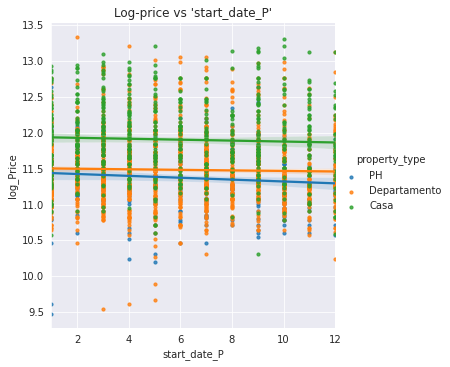

In [24]:
sns.lmplot(x='start_date_P', y='log_Price', data=df_covar,
             hue="property_type", height=5, scatter_kws={"s": 10})
plt.title("Log-price vs 'start_date_P'")

In [25]:
np.random.seed(1) 
ndata = len(df_covar)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.5*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train     = df_covar.iloc[idx_train] # the training data set
test      = df_covar.iloc[idx_test]  # the test data set
print(train.shape) # 19,312 rows and 19 columns
print(test.shape)  #  4,829 rows and 19 columns

(1250, 11)
(1250, 11)


In [26]:
df_covar.columns

Index(['start_date_P', 'property_type', 'rooms', 'bedrooms', 'bathrooms',
       'lat', 'lon', 'log_Price_per_S_total', 'log_Price_per_S_covered',
       'log_Price', 'price'],
      dtype='object')

In [27]:
covar = ("log_Price ~ start_date_P+property_type"
        "+ rooms + bedrooms + bathrooms + lat + lon"
        "+ log_Price_per_S_total + log_Price_per_S_covered")
model_rl= smf.ols(formula = covar, data = train).fit()
print(model_rl.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     189.3
Date:                Tue, 01 Sep 2020   Prob (F-statistic):          2.47e-241
Time:                        06:35:06   Log-Likelihood:                -370.18
No. Observations:                1250   AIC:                             762.4
Df Residuals:                    1239   BIC:                             818.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [29]:
df2 = df.copy()
df2['log_Price'] = np.log(df['price'])
df2 = df2[df.property_type.isin(["Departamento", "Casa", "PH"])]

In [30]:
df2.shape

(143145, 20)

In [31]:
np.random.seed(1) 
ndata = len(df2)
# Randomly choose 0.8n indices between 1 and n
idx_train = np.random.choice(range(ndata),int(0.5*ndata),replace=False)
# The test set is comprised from all the indices that were
# not selected in the training set:
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))
train2     = df2.iloc[idx_train] # the training data set
test2     = df2.iloc[idx_test]  # the test data set
print(train.shape) # 19,312 rows and 19 columns
print(test.shape)  #  4,829 rows and 19 columns

(1250, 11)
(1250, 11)


In [32]:
covar = ("log_Price ~ property_type"
        "+ rooms + bedrooms + bathrooms")
model_rl2= smf.ols(formula = covar, data = train2).fit()
print(model_rl2.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                 1.507e+04
Date:                Tue, 01 Sep 2020   Prob (F-statistic):               0.00
Time:                        07:02:33   Log-Likelihood:                -46506.
No. Observations:               69479   AIC:                         9.302e+04
Df Residuals:                   69473   BIC:                         9.308e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [33]:
errors = [round(RMSE(np.exp(model_rl.predict(test)),test.price),2),
round(MAE(np.exp(model_rl.predict(test)),test.price),2),
round(MAPE(np.exp(model_rl.predict(test)),test.price),2)]
errors

[82289.1, 34673.61, 31.49]

In [34]:
errors = [round(RMSE(np.exp(model_rl2.predict(test2)),test2.price),2),
round(MAE(np.exp(model_rl2.predict(test2)),test2.price),2),
round(MAPE(np.exp(model_rl2.predict(test2)),test2.price),2)]
errors

[783895.02, 99290.82, 40.0]

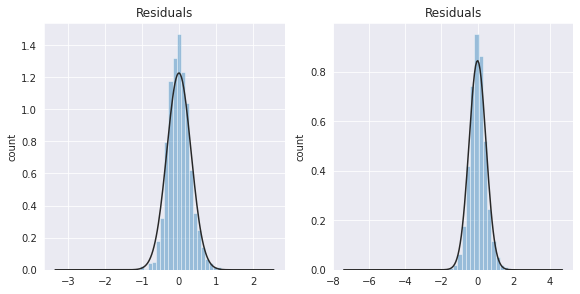

In [35]:
var_hist = [model_rl.resid, model_rl2.resid]
plt.figure(figsize=(25,10))
for i,var in enumerate(var_hist):
    plt.subplot(2,5,i+1)
    sns.distplot(var,fit=stats.norm, kde=False)
    plt.ylabel("count")
    plt.title('Residuals')